In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [65]:
df_train = pd.read_csv('train.csv',encoding='utf-8')
df_test = pd.read_csv('test.csv',encoding='utf-8')

In [66]:
df_test.dropna(inplace=True)
df_train.dropna(inplace=True)

In [252]:
df_test['label'].value_counts()

label
1    888
0    609
2    496
o      1
-      1
Name: count, dtype: int64

In [253]:
df_train['label'].value_counts()

label
1     2378
0     2376
2     1236
-        5
20       1
11       1
o        1
--       1
Name: count, dtype: int64

In [67]:
df_train = df_train[~df_train['label'].str.match(r'^(-|20|11|o|--)$')]
df_test = df_test[~df_test['label'].str.match(r'^(-|20|11|o|--)$')]

In [5]:
df_test['label'].unique()

array(['1', '0', '2'], dtype=object)

In [6]:
df_train['label'].unique()

array(['2', '1', '0'], dtype=object)

In [74]:
df_train = df_train[df_train['length']<=256]
df_test = df_test[df_test['length']<=256]

In [68]:
import demoji
# Function to replace emojis with descriptions and add spaces
def replace_emojis_with_space(text):
    # Replace emojis with descriptions, adding spaces before and after each description
    text = demoji.replace_with_desc(text, sep=" ")  # Add space between descriptions
    return text

In [69]:
import emoji

# Convert emojis to text
df_train['text'] = df_train['text'].apply(replace_emojis_with_space)
df_test['text'] = df_test['text'].apply(replace_emojis_with_space)

In [75]:
df_train['length'] = df_train['text'].apply(lambda x: len(x))
df_test['length'] = df_test['text'].apply(lambda x: len(x))

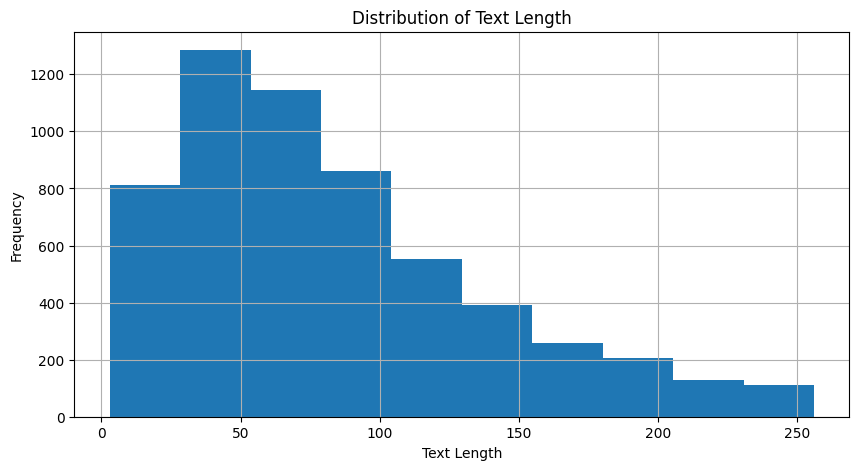

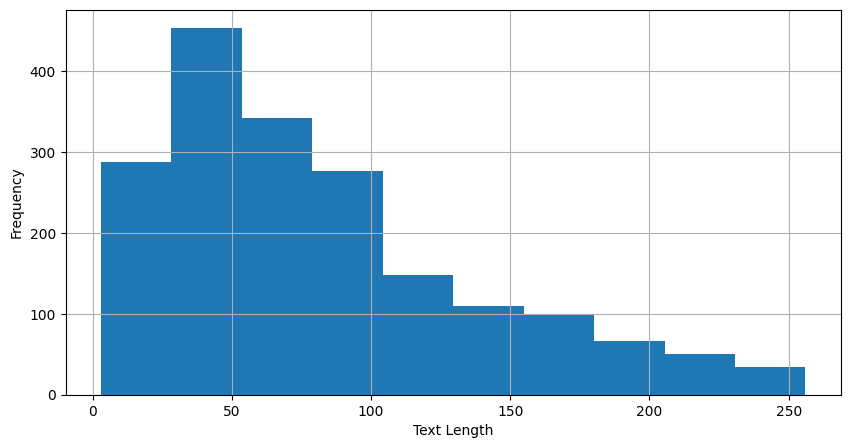

In [76]:
plt.figure(figsize=(10, 5))
plt.title('Distribution of Text Length')

df_train['length'].hist()
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()
plt.figure(figsize=(10, 5))
df_test['length'].hist()
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()


<Axes: >

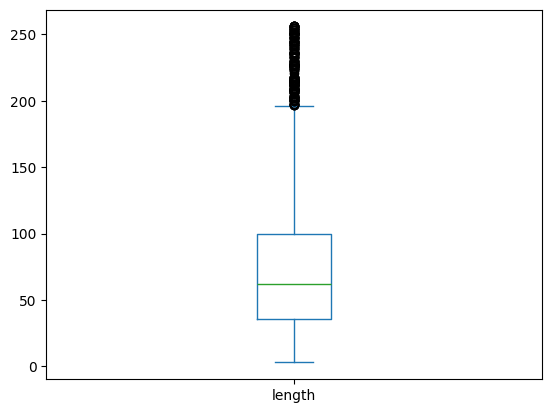

In [17]:
df_train['length'].plot(kind='box')

In [77]:
df_train['length'].quantile(0.95)

198.0

In [78]:
df_train['length'].describe()

count    5747.000000
mean       83.037063
std        55.477971
min         3.000000
25%        40.000000
50%        70.000000
75%       113.000000
max       256.000000
Name: length, dtype: float64

In [79]:
df_train.drop(columns=['length'], inplace=True,axis=1)
df_test.drop(columns=['length'], inplace=True,axis=1)

In [ ]:
from deep_translator import GoogleTranslator

def translate_english_to_nepali(batch):
    return GoogleTranslator(source='en', target='ne').translate_batch(batch)  

In [156]:
def contains_english_letters(text):
    # Check if the text contains at least one English letter (a-z or A-Z)
    return bool(re.search(r'[a-zA-Z]', text))

In [ ]:
"""
Description:
This function takes a list of sentences and converts them to nepali using batch translation

Problem:
The function to translate english to nepali is very slow so translating every sentence even those already in nepali is a waste of time
"""
def batch_translate_Older(sentences,batch_size=100):
    translated_list = []    
    for i in range(0,len(sentences),batch_size):
        print(f'Sentence: ',i)
        batch_sentences = sentences[i:i + batch_size]
        translated_sentences = translate_english_to_nepali(batch_sentences)
        translated_list.extend(translated_sentences)
    return translated_list

In [ ]:
""" 
Description: 
This function takes a list of sentences, looks for sentences containing english words,
tags those sentences, converts only those sentences containing english words and merges all
the sentences back to a single list with the order preserved

Problem:
The function that translates english to nepali converts the sentence as a whole which sometimes changes the meaning of the sentence
"""
def batch_translate_Old(sentences,batch_size=100):
    translated_list = []
    index = 0
    while index< len(sentences):
        batch_sentences = []
        non_batch_sentences = []
        need_translation = []        
        batch_idx = 0
        while batch_idx<batch_size and index<len(sentences):
            if contains_english_letters(sentences[index]):
                batch_sentences.append(sentences[index])
                need_translation.append(1)
            else:
                non_batch_sentences.append(sentences[index])
                need_translation.append(0)
            batch_idx+=1
            index+=1
        translated_sentences = translate_english_to_nepali(batch_sentences)
        batching_idx = 0
        non_batching_idx = 0        
        for this_idx in range(batch_idx):
            if need_translation[this_idx]:                
                translated_list.append(translated_sentences[batching_idx])
                batching_idx +=1
            else:                
                translated_list.append(non_batch_sentences[non_batching_idx])
                non_batching_idx+=1
    return translated_list


In [141]:
translated_text = batch_translate(list(df_test['text']))

Sentence:  0


In [143]:
len(translated_text)

100

In [ ]:
pd.to_csv()

In [ ]:
df_train.head()

In [55]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ankit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [56]:
#stopwords_list = set(nltk.corpus.stopwords.words('english') + nltk.corpus.stopwords.words('nepali'))

stopwords_list = set(nltk.corpus.stopwords.words('nepali'))

In [57]:
import codecs

# Initialize an empty list for extra stopwords
extra_stop_words = []

# Open the file with UTF-8 encoding
with codecs.open('nepali_stopwords.txt', 'r', encoding='utf-8') as file:
    for line in file:
        # Strip whitespace and add the word to the list
        extra_stop_words.append(line.strip())
stopwords_list.update(extra_stop_words)

In [58]:
stopwords_list = set(stopwords_list)

In [59]:
len(stopwords_list)

305

In [60]:
stopwords_list.remove('राम्रो')

In [61]:
def remove_stop_words(text):
    text = text.lower()
    filtered_words = [word for word in text.split() if word not in stopwords_list]
    return ' '.join(filtered_words)

In [123]:
df_train['text'] = df_train['text'].apply(remove_stop_words)
df_test['text'] = df_test['text'].apply(remove_stop_words)
    

In [128]:
import re
emoji_pattern = re.compile(
    "[\U0001F600-\U0001F64F"  # Emoticons
    "\U0001F300-\U0001F5FF"  # Symbols & Pictographs
    "\U0001F680-\U0001F6FF"  # Transport & Map Symbols
    "\U0001F700-\U0001F77F"  # Alchemical Symbols
    "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
    "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
    "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
    "\U0001FA00-\U0001FA6F"  # Chess Symbols
    "\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
    "\U00002702-\U000027B0"  # Dingbats
    "\U000024C2-\U0001F251"  # Enclosed Characters
    "]+", flags=re.UNICODE
)
def clean_text(text):
    text = re.sub(r'[^\w\s\u0900-\u097F]+', '', text)
    #text = re.sub(r'\b[a-zA-Z]+\b', '', text)    # Remove English alphabets
    text = re.sub(r'\s+', ' ', text).strip()    # Remove extra whitespace
    #text = emoji_pattern.sub(r'', text)  # Remove emojis
    text = re.sub(r'।', '', text)  # Remove the '।' character
    return text

In [129]:
df_train['text'] = df_train['text'].apply(clean_text)
df_test['text'] = df_test['text'].apply(clean_text)

In [130]:
df_train = df_train[df_train['text'] != '']
df_test = df_test[df_test['text'] != '']

In [131]:
df_train.to_csv('train_clean.csv',index=False)
df_test.to_csv('test_clean.csv',index=False)

In [81]:
df_train = pd.read_csv('train_clean.csv')

In [82]:
X = list(df_train['text'])

In [83]:
for idx,text in enumerate(X):
  if not isinstance(text, str):
    print(text)
    print(idx)